In [1]:
import numpy as np
import tensorflow as tf
from sif.kernels import SquaredExponentialKernel, MaternKernel
from sif.models import GaussianProcess
from sif.samplers import EllipticalSliceSampler

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Create random data.

In [3]:
X = np.random.normal(size=(150, 1))
y = np.random.normal(np.cos(3.*X) / (np.abs(X) + 1.), 0.2)
X_pred = np.atleast_2d(np.linspace(-3., 3., num=500)).T

Create the Gaussian process object.

In [4]:
gp = GaussianProcess(SquaredExponentialKernel(1))

Now we will produce the posterior expectation and variance of the Gaussian process under a fixed hyperparameter configuration. In this section, we'll also draw samples from the predictive posterior distribution of the Gaussian process.

In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    y_pred, cov_pred = sess.run(
        [gp.model_y_pred, gp.model_cov_pred], {
            gp.model_X: X,
            gp.model_y: y,
            gp.model_X_pred: X_pred
        }
    )
    std_pred = np.sqrt(np.diag(cov_pred))
    n_samples = 1000
    samples = sess.run(gp.sample, {
        gp.model_X: X,
        gp.model_y: y,
        gp.model_X_pred: X_pred,
        gp.n_samples: n_samples
    })

Visualize how well the samples conform to the expectation and variance characterization of the posterior.

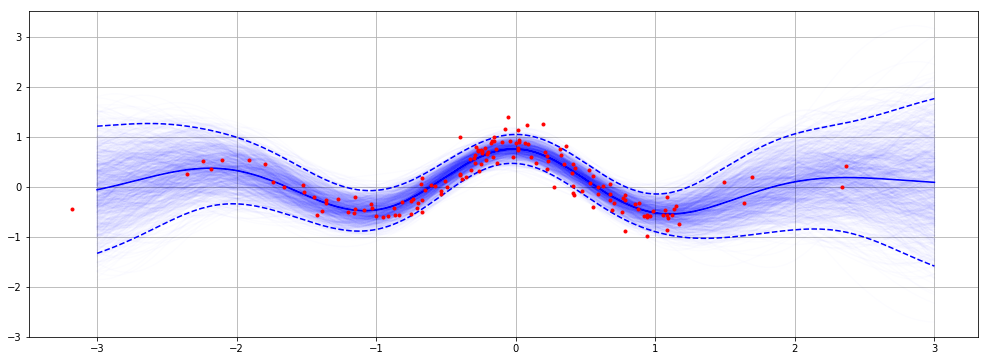

In [6]:
plt.figure(figsize=(17, 6))
plt.plot(X_pred.ravel(), y_pred.ravel(), "b-")
plt.plot(X_pred.ravel(), y_pred.ravel() + 2. * std_pred, "b--")
plt.plot(X_pred.ravel(), y_pred.ravel() - 2. * std_pred, "b--")
for i in range(n_samples):
    plt.plot(X_pred.ravel(), samples[i], "b-", alpha=0.01)
plt.plot(X.ravel(), y.ravel(), "r.")
plt.grid()
plt.show()